# Pairing Clade with Sequences

(3583, 2)
hCoV-19/Wuhan/WIV04/2019
29891

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGC

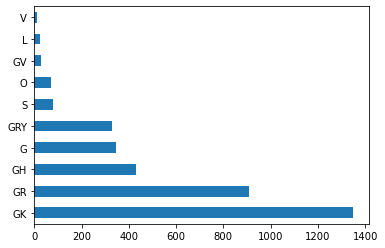

In [1]:
import pandas as pd
from Bio import SeqIO


data = pd.read_csv ("/Users/jarodw/Documents/pathogenetic-potential/data/hcov_global.tsv", sep = '\t')
#data_top = data.head()


strain_clade = (data[["strain","GISAID_clade"]]).sort_values(by="strain")                        
print(strain_clade.shape)


i=0
X=[]

for seq_record in SeqIO.parse("/Users/jarodw/Documents/pathogenetic-potential/data/hcov_global.fasta", "fasta"):  
      
     #temporary solution to match sequences to clade   
    for j in range(len(strain_clade)) :
        if strain_clade.loc[j, "strain"] == seq_record.id:
            x = [ seq_record.id, seq_record.seq ,strain_clade.loc[j,"GISAID_clade"]]
            X.append(x)

    #Sample Record
    if i == 0: #Example sequence
        print(seq_record.id)
        print(len(seq_record), end = '\n\n')
        print(seq_record.seq, end = '\n\n')
        
         
    i += 1

print(len(X))

df = pd.DataFrame(X, columns = ['strain', 'seq', 'clade'])
df.head()
clades = pd.unique(df['clade'])
print(clades)


clade_count = df["clade"].value_counts()
(clade_count).plot(kind='barh')


df.to_csv('DATA.csv')


